In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as ply
import seaborn as sns

In [ ]:
indian_census = pd.read_csv("/content/drive/MyDrive/Indian census/india_census.csv")

In [ ]:
literacy_data = pd.read_csv('/content/drive/MyDrive/Indian census/literacy_rate.txt')
literacy_data_male = pd.read_csv("/content/drive/MyDrive/Indian census/male_literacy.txt")
literacy_data_female = pd.read_csv("/content/drive/MyDrive/Indian census/female_literacy.txt")

In [ ]:
literacy_data.head()

,Unnamed: 0,year,persons,gap in rate,Unnamed: 4
0,1.0,1901,5.4,9.2,NaN
1,2.0,1911,5.9,9.6,NaN
2,3.0,1921,7.2,10.4,NaN
3,4.0,1931,9.5,12.7,NaN
4,5.0,1941,16.1,17.6,NaN


In [ ]:
literacy_data_male.head()

,sn0,year,rate
0,1.0,1901,9.8
1,2.0,1911,10.6
2,3.0,1921,12.2
3,4.0,1931,15.6
4,5.0,1941,24.9


In [ ]:
literacy_data_female.head()

,sn0,year,rate
0,1.0,1901,0.6
1,2.0,1911,1.0
2,3.0,1921,1.8
3,4.0,1931,2.9
4,5.0,1941,7.3


In [ ]:
literacy_data.rename(columns={'gap in rate': 'growth in rate'}, inplace=True)

In [ ]:
literacy_data

,Unnamed: 0,year,persons,growth in rate,Unnamed: 4
0,1.0,1901,5.40,9.20,NaN
1,2.0,1911,5.90,9.60,NaN
2,3.0,1921,7.20,10.40,NaN
3,4.0,1931,9.50,12.70,NaN
4,5.0,1941,16.10,17.60,NaN
5,6.0,1951,18.33,12.30,NaN
6,7.0,1961,28.30,25.05,NaN
7,8.0,1971,34.45,23.98,NaN
8,9.0,1981,43.57,26.62,NaN
9,10.0,1991,52.21,24.84,NaN


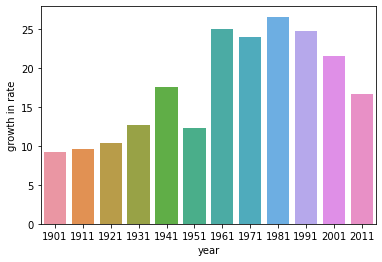

In [ ]:
ax = sns.barplot(y="growth in rate", x="year", data=literacy_data)

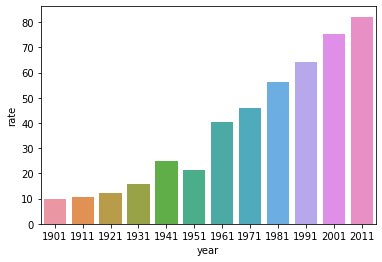

In [ ]:
ax = sns.barplot(y="rate", x="year", data=literacy_data_male)

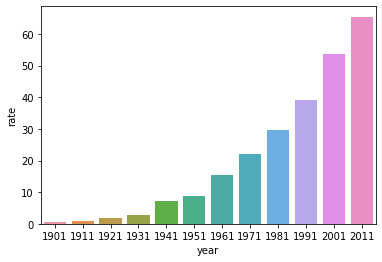

In [ ]:
ax = sns.barplot(y="rate", x="year", data=literacy_data_female)

In [ ]:
import plotly.graph_objects as go
fig4 = go.Figure(layout_yaxis_range=[0,100])
fig4.add_trace(go.Bar(x=literacy_data_female['year'],y=literacy_data_female['rate'],name= "Female Literacy Rate",marker_color = 'rgb(20,60,234)'))
fig4.add_trace(go.Bar(x=literacy_data_male['year'],y=literacy_data_male['rate'],name= "Male Literacy Rate",marker_color = 'rgb(235,100,24)'))

fig4.update_layout(
    title=" LITERACY RATE COMPARISION 1901-2011",
  
)
fig4.update_layout( font= dict(
        size=25,
        color="RebeccaPurple"
    ))
fig4.show()

In [ ]:
Year = literacy_data[['year']]
Rate = literacy_data[['growth in rate']]


In [ ]:
#Fitting the Linear Regression model
from sklearn.linear_model import LinearRegression
slr = LinearRegression()  
slr.fit(Year,Rate)

LinearRegression()

In [ ]:
new_years = np.array([2021,2031,2041,2051]).reshape(-1,1)

In [ ]:
print("Intercept: ", slr.intercept_)
print("Coefficient: ", slr.coef_)

Intercept:  [-251.06821445]
Coefficient:  [[0.13732867]]


In [ ]:
y_pred_slr= slr.predict(new_years)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
y_pred_slr

array([[26.4730303 ],
       [27.84631702],
       [29.21960373],
       [30.59289044]])

In [ ]:
a = slr.intercept_ + (slr.coef_[0])*2020

In [ ]:
a

array([26.33570163])

In [ ]:
from sklearn.metrics import mean_squared_error
import math
slrmse = mean_squared_error(Rate.iloc[:len(new_years),:], y_pred_slr)
slrrmse = math.sqrt(mean_squared_error(Rate.iloc[:len(new_years),:], y_pred_slr))
print(slrmse)
print(slrrmse)

326.40466836248504
18.06667286365935


In [ ]:
 #Fitting the Polynomial regression to the dataset  
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 2)  
x_poly= poly_regs.fit_transform(Year)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly,Rate)  

LinearRegression()

In [ ]:
new_years_x_poly= poly_regs.fit_transform(new_years) 

In [ ]:
y_poly_pred = lin_reg_2.predict(new_years_x_poly)

In [ ]:
y_poly_pred

array([[19.32818182],
       [17.40384615],
       [15.00842158],
       [12.14190809]])

In [ ]:
from sklearn.metrics import mean_squared_error
import math
pmse = mean_squared_error(Rate.iloc[:len(new_years),:], y_poly_pred)
prmse =math.sqrt(mean_squared_error(Rate.iloc[:len(new_years),:], y_poly_pred)) 
print(pmse)
print(prmse)

46.25727444752357
6.80127006135792


In [ ]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(Year,Rate)

DecisionTreeRegressor()

In [ ]:
y_pred_DTregressor= regressor.predict(new_years)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



In [ ]:
y_pred_DTregressor

array([16.68, 16.68, 16.68, 16.68])

In [ ]:
from sklearn.metrics import mean_squared_error
import math
dmse = mean_squared_error(Rate.iloc[:len(new_years),:], y_pred_DTregressor)
drmse  = math.sqrt(mean_squared_error(Rate.iloc[:len(new_years),:], y_pred_DTregressor))
print(dmse)
print(drmse)

40.33890000000001
6.351291207305803


In [ ]:
from sklearn.svm import SVR
SVM_regressor = SVR(kernel = 'rbf')
SVM_regressor.fit(Year,Rate)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR()

In [ ]:
y_pred_SVM = SVM_regressor.predict(new_years)
y_pred_SVM

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names



array([17.44185698, 16.9573237 , 16.7399176 , 16.68936975])

In [ ]:
from sklearn.metrics import mean_squared_error
import math
smse =mean_squared_error(Rate.iloc[:len(new_years),:], y_pred_SVM)
srmse=math.sqrt(mean_squared_error(Rate.iloc[:len(new_years),:], y_pred_SVM))
print(smse)
print(srmse)

44.54201118238673
6.673980160472964


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(Year,Rate)
LassoPredicter = lasso.predict(new_years)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but Lasso was fitted with feature names



In [ ]:
from sklearn.metrics import mean_squared_error
import math
lmse = mean_squared_error(Rate.iloc[:len(new_years),:], LassoPredicter)
lrmse = math.sqrt(mean_squared_error(Rate.iloc[:len(new_years),:], LassoPredicter))
print(lmse)
print(lrmse)

323.97959398231967
17.999433157250248


In [ ]:
from sklearn.linear_model import Ridge
rng = np.random.RandomState(0)

rdg = Ridge(alpha = 0.2)
rdg.fit(Year,Rate)
#rdg.score(X,y)
ridgepredictor = rdg.predict(new_years)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but Ridge was fitted with feature names



In [ ]:
from sklearn.metrics import mean_squared_error
import math
rmse = mean_squared_error(Rate.iloc[:len(new_years),:], ridgepredictor)
rrmse =math.sqrt(mean_squared_error(Rate.iloc[:len(new_years),:], ridgepredictor))
print(rmse)
print(math.sqrt(mean_squared_error(Rate.iloc[:len(new_years),:], ridgepredictor)))

326.39910741022203
18.06651896216374


In [ ]:
Results_df = pd.DataFrame({'New Year':new_years.reshape(-1),'Linear Regression':y_pred_slr.reshape(-1), 'Decision Tree Regression':y_pred_DTregressor.reshape(-1),'Polynomial Regression':y_poly_pred.reshape(-1),'SVM Regression':y_pred_SVM.reshape(-1),'Ridge Regression':ridgepredictor.reshape(-1),"Lasso Regression":LassoPredicter.reshape(-1)})

In [ ]:
Results_df

,New Year,Linear Regression,Decision Tree Regression,Polynomial Regression,SVM Regression,Ridge Regression,Lasso Regression
0,2021,26.473030,16.68,19.328182,17.441857,26.472905,26.418485
1,2031,27.846317,16.68,17.403846,16.957324,27.846173,27.783380
2,2041,29.219604,16.68,15.008422,16.739918,29.219440,29.148275
3,2051,30.592890,16.68,12.141908,16.689370,30.592708,30.513170


In [ ]:
import plotly.express as px 
fig = px.line(Results_df, x='New Year', y=Results_df.columns[1:])
fig.update_layout( 
    xaxis_title='Year',
    yaxis_title='Literacy Rate',
    font= dict(
        size=25,
        color="RebeccaPurple"
    ))
fig.show()
